<a href="https://colab.research.google.com/github/kaigitt/GoogleColab/blob/master/%E3%80%90%E7%A0%82%E5%B7%9D%E5%BF%AB%E6%96%97%E3%80%91%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92%E3%81%AE%E6%BC%94%E7%BF%92_editor_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 教師あり学習の演習

## 0. 事前準備

### 0.1 環境構築

まずは次のセルを実行してください。

In [ ]:
# こちらのセルを実行してください。
!pip install openpyxl==3.0.0

実行が完了したら、左上のメニューバーから「ランタイム」 $\rightarrow$ 「ランタイムを再起動」を押してください。

ランタイムの再起動が終わったら、次のセルを実行してください。

In [ ]:
# こちらのセルを実行してください。
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

今回使用するデータをダウンロードします。

次のセルを実行してください。

In [ ]:
!wget "https://us.v-cdn.net/6032257/uploads/jive_attachments/6/3/1/63186354tnemhcatta.xlsx" -O 'cycle_training.xlsx'

--2022-04-06 10:20:17--  https://us.v-cdn.net/6032257/uploads/jive_attachments/6/3/1/63186354tnemhcatta.xlsx
Resolving us.v-cdn.net (us.v-cdn.net)... 104.18.194.13, 104.18.193.13, 2606:4700::6812:c20d, ...
Connecting to us.v-cdn.net (us.v-cdn.net)|104.18.194.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62467 (61K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘cycle_training.xlsx’

cycle_training.xlsx 100%[===================>]  61.00K  --.-KB/s    in 0.004s  

2022-04-06 10:20:17 (13.6 MB/s) - ‘cycle_training.xlsx’ saved [62467/62467]



これで、ダウンロードできました。次のセルを実行して、データフレームとして読み込みましょう。

In [ ]:
df_cycle = pd.read_excel('cycle_training.xlsx')
df_cycle

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,ID-526,Summer,2012,2012-06-09,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498
526,ID-527,Summer,2012,2012-06-10,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598
527,ID-528,Summer,2012,2012-06-11,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664
528,ID-529,Summer,2012,2012-06-12,6,No,2,Yes,Cloudy,0.653333,0.597875,0.833333,0.214546,4972


これでデータのダウンロードができました。

### 0.2 データ・演習についての説明

今回は天気や日時に関するデータから、レンタサイクルのレンタル数(df_cycleの'count'列)について予測するモデルを作っていただきます。

各列の意味は次のようになっています。
- Instant: 日時固有のID
- Season: 季節	
- year: 年
- dteday: 年月日
- mnth: 月
- holiday: 祝日か否か
- weekday: 曜日
- WorkingDay: 営業日か否か
- weathersit: 天候
- temp: 気温
- atemp: 体感気温
- hum: 湿度
- windspeed: 風速
- count: レンタル数



これらを用いて2011年のデータを学習させ、2012年のcountを予測するモデルを作成してください。

*タイタニックデータと同様に、まずはデータの確認及び可視化を行って、データの外観を理解した上で必要な前処理を実施してください。
その上で適切なモデルを作成し、精度評価を実行するという流れで行ってください。

(こちらはは自由記述課題になります。)

#データの確認

In [ ]:
#レコード数確認
len(df_cycle)

530

In [ ]:
#カラム数確認
len(df_cycle.columns)

14

In [ ]:
df_cycle.head()

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
#データ型確認
df_cycle.dtypes

Instant               object
Season                object
year                   int64
dteday        datetime64[ns]
mnth                   int64
holiday               object
weekday                int64
WorkingDay            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
count                  int64
dtype: object

In [ ]:
#各カラムの統計量算出
df_cycle.describe().round(3)

,year,mnth,weekday,temp,atemp,hum,windspeed,count
count,530.000,530.000,530.000,530.000,530.000,530.000,530.000,530.000
mean,2011.311,5.504,2.994,0.473,0.455,0.626,0.196,3900.515
std,0.463,3.362,2.003,0.179,0.160,0.151,0.078,1662.359
min,2011.000,1.000,0.000,0.059,0.079,0.000,0.022,431.000
25%,2011.000,3.000,1.000,0.324,0.322,0.507,0.139,2603.750
50%,2011.000,5.000,3.000,0.464,0.457,0.626,0.189,4062.000
75%,2012.000,8.000,5.000,0.628,0.585,0.738,0.238,4888.500
max,2012.000,12.000,6.000,0.849,0.841,0.972,0.507,8362.000


#データ加工

In [ ]:
df_cycle_except_object = df_cycle[['count', 'dteday', 'year', 'mnth', 'weekday', 'Season', 'holiday', 'WorkingDay', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
df_cycle_except_object

,count,dteday,year,mnth,weekday,Season,holiday,WorkingDay,weathersit,temp,atemp,hum,windspeed
0,985,2011-01-01,2011,1,6,Spring,No,No,Cloudy,0.344167,0.363625,0.805833,0.160446
1,801,2011-01-02,2011,1,0,Spring,No,No,Cloudy,0.363478,0.353739,0.696087,0.248539
2,1349,2011-01-03,2011,1,1,Spring,No,Yes,Clear,0.196364,0.189405,0.437273,0.248309
3,1562,2011-01-04,2011,1,2,Spring,No,Yes,Clear,0.200000,0.212122,0.590435,0.160296
4,1600,2011-01-05,2011,1,3,Spring,No,Yes,Clear,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,7498,2012-06-09,2012,6,6,Summer,No,No,Clear,0.710833,0.648367,0.437083,0.144287
526,6598,2012-06-10,2012,6,0,Summer,No,No,Clear,0.726667,0.663517,0.538333,0.133721
527,6664,2012-06-11,2012,6,1,Summer,No,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713
528,4972,2012-06-12,2012,6,2,Summer,No,Yes,Cloudy,0.653333,0.597875,0.833333,0.214546


2012年のデータは先に切り離す

In [ ]:
df_cycle_2012 = pd.get_dummies(df_cycle_except_object[['count', 'year', 'mnth', 'weekday', 'temp', 'hum', 'windspeed', 'Season', 'holiday', 'WorkingDay', 'weathersit']])
df_cycle_2012 = df_cycle_2012[df_cycle_2012['year'] == 2012]

df_cycle_2012

,count,year,mnth,weekday,temp,hum,windspeed,Season_Fall,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain
365,2294,2012,1,0,0.370000,0.692500,0.192167,0,1,0,0,1,0,1,0,1,0,0
366,1951,2012,1,1,0.273043,0.381304,0.329665,0,1,0,0,0,1,1,0,1,0,0
367,2236,2012,1,2,0.150000,0.441250,0.365671,0,1,0,0,1,0,0,1,1,0,0
368,2368,2012,1,3,0.107500,0.414583,0.184700,0,1,0,0,1,0,0,1,0,1,0
369,3272,2012,1,4,0.265833,0.524167,0.129987,0,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,7498,2012,6,6,0.710833,0.437083,0.144287,0,0,1,0,1,0,1,0,1,0,0
526,6598,2012,6,0,0.726667,0.538333,0.133721,0,0,1,0,1,0,1,0,1,0,0
527,6664,2012,6,1,0.720833,0.587917,0.207713,0,0,1,0,1,0,0,1,0,1,0
528,4972,2012,6,2,0.653333,0.833333,0.214546,0,0,1,0,1,0,0,1,0,1,0


この後のデータ可視化とデータ分析に2011年のデータを用いる

In [ ]:
df_cycle_except_object = df_cycle_except_object[df_cycle_except_object['year'] == 2011]
df_cycle_except_object

,count,dteday,year,mnth,weekday,Season,holiday,WorkingDay,weathersit,temp,atemp,hum,windspeed
0,985,2011-01-01,2011,1,6,Spring,No,No,Cloudy,0.344167,0.363625,0.805833,0.160446
1,801,2011-01-02,2011,1,0,Spring,No,No,Cloudy,0.363478,0.353739,0.696087,0.248539
2,1349,2011-01-03,2011,1,1,Spring,No,Yes,Clear,0.196364,0.189405,0.437273,0.248309
3,1562,2011-01-04,2011,1,2,Spring,No,Yes,Clear,0.200000,0.212122,0.590435,0.160296
4,1600,2011-01-05,2011,1,3,Spring,No,Yes,Clear,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1162,2011-12-27,2011,12,2,Spring,No,Yes,Cloudy,0.325000,0.327633,0.762500,0.188450
361,2302,2011-12-28,2011,12,3,Spring,No,Yes,Clear,0.299130,0.279974,0.503913,0.293961
362,2423,2011-12-29,2011,12,4,Spring,No,Yes,Clear,0.248333,0.263892,0.574167,0.119412
363,2999,2011-12-30,2011,12,5,Spring,No,Yes,Clear,0.311667,0.318812,0.636667,0.134337


In [ ]:
df_cycle_except_object.dtypes

count                  int64
dteday        datetime64[ns]
year                   int64
mnth                   int64
weekday                int64
Season                object
holiday               object
WorkingDay            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
dtype: object

#データの可視化により関連性調査

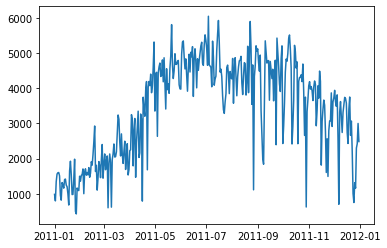

In [ ]:
#レンタル数推移
plt.figure()
plt.plot(df_cycle_except_object['dteday'], df_cycle_except_object['count'])
plt.show()

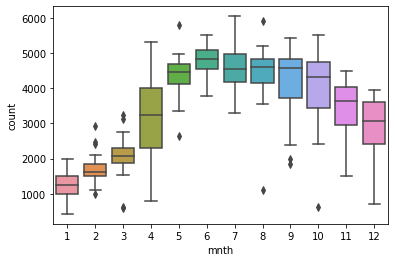

In [ ]:
#月ごとのレンタル数
plt.figure()
sns.boxplot(x=df_cycle_except_object['mnth'], y=df_cycle_except_object['count'])
plt.show()

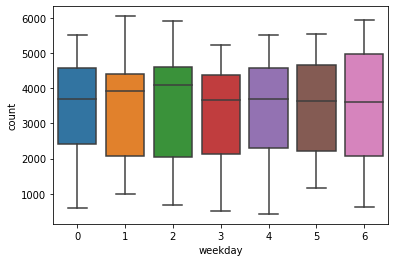

In [ ]:
#週単位でのレンタル数
plt.figure()
sns.boxplot(x=df_cycle_except_object['weekday'], y=df_cycle_except_object['count'])
plt.show()

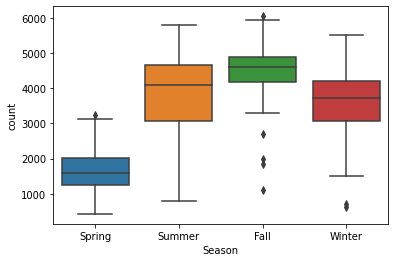

In [ ]:
#季節ごとのレンタル数
plt.figure()
sns.boxplot(x=df_cycle_except_object['Season'], y=df_cycle_except_object['count'])
plt.show()

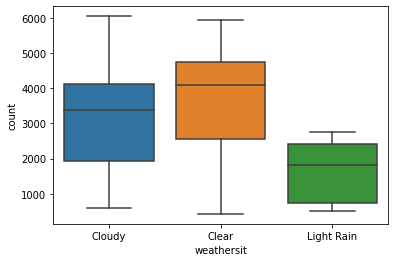

In [ ]:
#天候ごとのレンタル数
plt.figure()
sns.boxplot(x=df_cycle_except_object['weathersit'], y=df_cycle_except_object['count'])
plt.show()

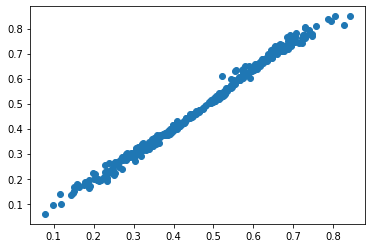

In [ ]:
#体感気温と気温の相関
plt.figure()
plt.scatter(df_cycle_except_object['atemp'], df_cycle_except_object['temp'])
plt.show()

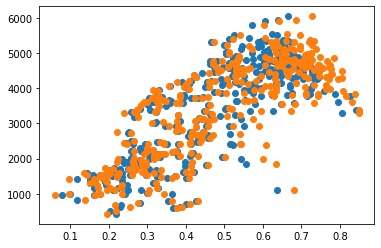

In [ ]:
#体感気温,気温とレンタル数
plt.figure()
plt.scatter(df_cycle_except_object['atemp'], df_cycle_except_object['count'])
plt.scatter(df_cycle_except_object['temp'], df_cycle_except_object['count'])
plt.show()

体感気温と実際の気温はほとんど同じ推移であり
各々レンタル数との相関もほとんど同じため、体感気温はデータから削除し実際の気温のみ分析に用いる

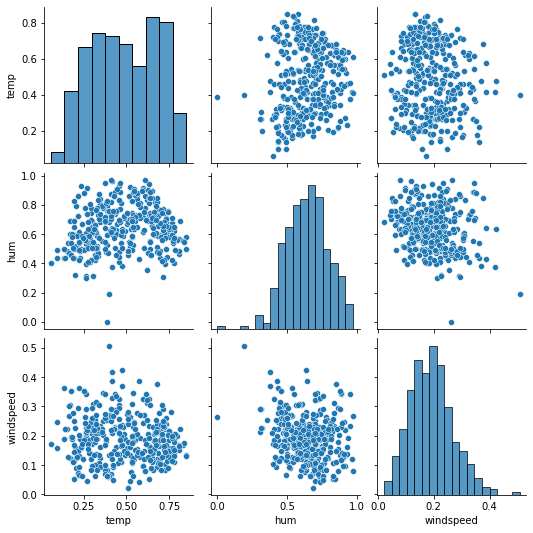

In [ ]:
#量的変数のみ散布図行列で確認
df_cycle_countable = df_cycle_except_object[['temp', 'hum','windspeed']]

sns.pairplot(data=df_cycle_countable)

In [ ]:
#各変数間の相関係数確認
df_cycle_except_object.corr()

,count,year,mnth,weekday,temp,atemp,hum,windspeed
count,1.000000,NaN,0.444607,-0.004396,0.771214,0.775294,0.001898,-0.278000
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,0.444607,NaN,1.000000,0.012860,0.288663,0.301920,0.242533,-0.242443
weekday,-0.004396,NaN,0.012860,1.000000,-0.039292,-0.042810,-0.065932,0.061525
temp,0.771214,NaN,0.288663,-0.039292,1.000000,0.996458,0.145776,-0.114200
atemp,0.775294,NaN,0.301920,-0.042810,0.996458,1.000000,0.155812,-0.136544
hum,0.001898,NaN,0.242533,-0.065932,0.145776,0.155812,1.000000,-0.215718
windspeed,-0.278000,NaN,-0.242443,0.061525,-0.114200,-0.136544,-0.215718,1.000000


In [ ]:
#予測・学習のために定性的な変数をダミー変数化
df_cycle_except_object = pd.get_dummies(df_cycle[['count', 'year', 'mnth', 'weekday', 'temp', 'hum', 'windspeed', 'Season', 'holiday', 'WorkingDay', 'weathersit']])


In [ ]:
df_cycle_except_object = df_cycle_except_object[df_cycle_except_object['year'] == 2011]
df_cycle_except_object

,count,year,mnth,weekday,temp,hum,windspeed,Season_Fall,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain
0,985,2011,1,6,0.344167,0.805833,0.160446,0,1,0,0,1,0,1,0,0,1,0
1,801,2011,1,0,0.363478,0.696087,0.248539,0,1,0,0,1,0,1,0,0,1,0
2,1349,2011,1,1,0.196364,0.437273,0.248309,0,1,0,0,1,0,0,1,1,0,0
3,1562,2011,1,2,0.200000,0.590435,0.160296,0,1,0,0,1,0,0,1,1,0,0
4,1600,2011,1,3,0.226957,0.436957,0.186900,0,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1162,2011,12,2,0.325000,0.762500,0.188450,0,1,0,0,1,0,0,1,0,1,0
361,2302,2011,12,3,0.299130,0.503913,0.293961,0,1,0,0,1,0,0,1,1,0,0
362,2423,2011,12,4,0.248333,0.574167,0.119412,0,1,0,0,1,0,0,1,1,0,0
363,2999,2011,12,5,0.311667,0.636667,0.134337,0,1,0,0,1,0,0,1,1,0,0


#学習データ、検証データ分割

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
X = df_cycle_except_object.drop('count', axis=1)
y = df_cycle_except_object['count']
print(X.shape)
print(y.shape)

(365, 17)
(365,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

   year  mnth  weekday      temp       hum  windspeed  Season_Fall  \
0  2011     1        6  0.344167  0.805833   0.160446            0   
1  2011     1        0  0.363478  0.696087   0.248539            0   
2  2011     1        1  0.196364  0.437273   0.248309            0   
3  2011     1        2  0.200000  0.590435   0.160296            0   
4  2011     1        3  0.226957  0.436957   0.186900            0   

   Season_Spring  Season_Summer  Season_Winter  holiday_No  holiday_Yes  \
0              1              0              0           1            0   
1              1              0              0           1            0   
2              1              0              0           1            0   
3              1              0              0           1            0   
4              1              0              0           1            0   

   WorkingDay_No  WorkingDay_Yes  weathersit_Clear  weathersit_Cloudy  \
0              1               0                 0     

#モデリング

RandomForestRegressorのモデル使用

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF = RandomForestRegressor(random_state=0)

In [ ]:
random_forest = RF.fit(X_train,y_train)

In [ ]:
y_pred = random_forest.predict(X_test)
y_pred

array([4854.22, 4775.36, 4067.63, 4165.13, 4014.14, 4257.48, 4141.21,
       3498.63, 3343.41, 3469.66, 3313.77, 3725.82, 3841.37, 3821.25,
       3692.82, 3766.05, 4671.8 , 4371.2 , 2312.7 , 2268.74, 2471.92,
       4263.5 , 4310.32, 4444.03, 4553.62, 4724.86, 4434.41, 4629.13,
       3857.82, 2663.31, 3439.23, 4078.9 , 4628.85, 4448.41, 4350.78,
       4198.24, 2794.51, 3792.42, 2693.33, 2780.21, 2783.83, 3840.12,
       4391.66, 4036.78, 3658.48, 2046.74, 1427.94, 2289.13, 2290.75,
       2632.84, 2584.6 , 2625.63, 2367.01, 2267.15, 2397.77, 2634.13,
       2612.45, 2577.01, 2381.53, 2248.88, 2342.12, 3186.15, 4303.61,
       4082.26, 2596.77, 2201.64, 2171.01, 2244.66, 3989.52, 2602.38,
       1476.25, 2785.63, 2608.79, 2492.79, 2564.92, 4187.37, 4234.28,
       3536.69, 2187.56, 2140.15, 2142.45, 2187.07, 2217.  , 2458.7 ,
       2515.32, 1346.63, 2044.98, 2035.51, 2214.56, 1966.27, 1848.64,
       2040.19, 2121.23, 2479.11, 2288.72, 2011.75, 1916.7 , 2043.79,
       2520.23, 2471

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23455 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20104 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 28204 missing from current font.
  font.set_te

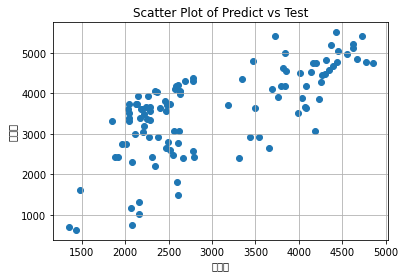

In [ ]:
plt.scatter(y_pred,y_test)
plt.title('Scatter Plot of Predict vs Test')    
plt.xlabel('予測値') 
plt.ylabel('実測値')    
plt.grid()                                 
plt.show()  

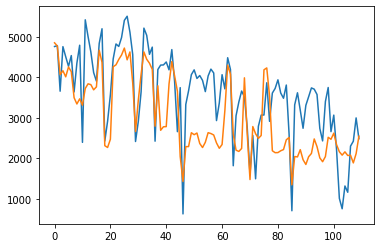

In [ ]:
plt.figure()
#予測値
plt.plot(y_test.reset_index(drop=True))
#実測値
plt.plot(y_pred)
plt.show()

In [ ]:
#MAPEでの評価
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_pred,y_test)

0.32624150966797516

In [ ]:
#決定係数での評価
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

-0.07712943152591967

#2012年レンタル数の予測

In [ ]:
y = df_cycle_2012['count']
y = y.reset_index(drop=True)

In [ ]:
X_2012 = df_cycle_2012.drop(['count'], axis=1)
X_2012

,year,mnth,weekday,temp,hum,windspeed,Season_Fall,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain
365,2012,1,0,0.370000,0.692500,0.192167,0,1,0,0,1,0,1,0,1,0,0
366,2012,1,1,0.273043,0.381304,0.329665,0,1,0,0,0,1,1,0,1,0,0
367,2012,1,2,0.150000,0.441250,0.365671,0,1,0,0,1,0,0,1,1,0,0
368,2012,1,3,0.107500,0.414583,0.184700,0,1,0,0,1,0,0,1,0,1,0
369,2012,1,4,0.265833,0.524167,0.129987,0,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2012,6,6,0.710833,0.437083,0.144287,0,0,1,0,1,0,1,0,1,0,0
526,2012,6,0,0.726667,0.538333,0.133721,0,0,1,0,1,0,1,0,1,0,0
527,2012,6,1,0.720833,0.587917,0.207713,0,0,1,0,1,0,0,1,0,1,0
528,2012,6,2,0.653333,0.833333,0.214546,0,0,1,0,1,0,0,1,0,1,0


In [ ]:
y_2012 = random_forest.predict(X_2012)
y_2012

array([1223.43, 1292.94, 1352.79, 1418.22, 1766.29, 1797.1 , 1542.77,
       1434.17, 1182.74, 1643.78, 1191.52, 1400.17, 1752.79, 1074.5 ,
        957.87, 1083.94, 1335.65, 1722.28, 1469.4 , 1646.29,  961.53,
        951.63,  901.64, 1225.96, 1647.59, 1355.28, 1447.41, 1401.67,
       1357.67, 1741.93, 1808.6 , 3560.38, 2078.88, 1895.05, 1642.16,
       1608.65, 1718.71, 2007.34, 1620.12, 1743.62, 1827.2 , 1269.14,
       1387.96, 1747.  , 1914.38, 2059.72, 1807.68, 1999.35, 2042.18,
       1645.69, 1578.86, 1741.24, 2064.79, 3274.11, 1872.36, 1837.73,
       1845.68, 1921.01, 2046.76, 1802.39, 3360.83, 2096.74, 2506.81,
       2184.19, 1822.13, 1883.86, 2316.56, 3092.47, 2118.77, 2215.  ,
       2371.16, 3668.5 , 3478.08, 3612.15, 3360.42, 2577.02, 3578.87,
       3197.63, 3200.62, 3399.82, 3433.89, 3557.91, 3884.44, 3646.36,
       2570.79, 3244.38, 2290.75, 3821.06, 3837.59, 2151.87, 2305.27,
       2740.62, 2510.64, 3949.59, 3959.77, 2870.49, 2504.21, 3133.68,
       4051.78, 3527

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0, flags=flags)


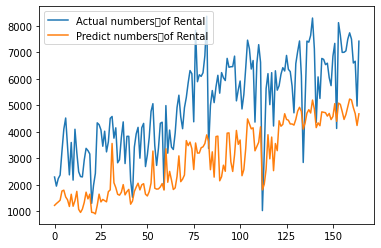

In [ ]:
plt.figure()
plt.plot(y, label='Actual numbers　of Rental')
plt.plot(y_2012, label='Predict numbers　of Rental')
plt.legend()
plt.show()

yは2012年の実際のレンタル数
y_2012はランダムフォレストのモデルを用いたレンタル予測値

In [ ]:
#MAPEでの評価
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_2012,y)

0.801722025124432